# Predicting the Sound Level of Aerofoils (in decibel)

In this exercise, you will perform a regression task on the [Airfoil Dataset](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise) provided by NASA. The fields names are slightly changed to better reflect the functionality. You can download the [csv here](https://leeds365-my.sharepoint.com/:x:/g/personal/scsaalt_leeds_ac_uk/EfVFtarOxUNJjO46KoNYhMoBiu23Xs1gu6ptw6iNG4K4uw?e=EPexxx). The code works with the new names not the original names, so please make sure to download and use the specified csv file.
The dataset has about 1500 data points, each with 5 attributes and one target value. We are interested to guess (predict) the sound level generated by the different aerofoils tests with various wind tunnel speeds and angles of attack, that were conducted by NASA.

**Learning Outcomes**
1. Apply Least Squares on univariate linear regression model
2. Apply Least Squares on multivariate linear regression model
3. Understand the meaning of SSE, MSE and RMSE in a practical context
4. Employ different basis functions with linear models to obtain a generalised linear model
5. Appreciate the difficulty of choosing a suitable basis function
6. Employ simple visualisation to get insights of the dataset characteristics


## Load the data

In [103]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
airfoil = pd.read_csv('airfoil_self_noise.csv') #  we assume that you have this file in the same directory of this notebook!

In [105]:
airfoil.head()

,Frequency(Hertzs),Angle_of_attack(degrees),Chord_length(meters),Free_stream_velocity(m^2/s),Suction_displacement_thickness(meters),Scaled_sound_pressure_level(decibels)
0,20000,0.0,0.2286,71.3,0.002143,114.474
1,20000,4.0,0.2286,71.3,0.004006,109.638
2,20000,0.0,0.0254,71.3,0.000401,123.217
3,20000,0.0,0.0254,55.5,0.000412,121.933
4,20000,4.8,0.0254,71.3,0.000849,119.708


In [106]:
print(airfoil.columns)

Index(['Frequency(Hertzs)', 'Angle_of_attack(degrees)', 'Chord_length(meters)',
       ' Free_stream_velocity(m^2/s)',
       ' Suction_displacement_thickness(meters)',
       'Scaled_sound_pressure_level(decibels)'],
      dtype='object')


We want to predict the Scaled_sound_pressure_level(decibels)

<AxesSubplot:>

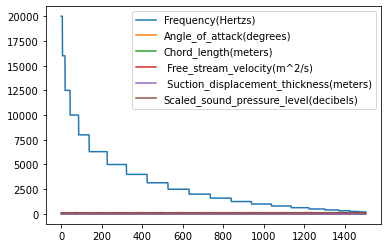

In [107]:
airfoil.plot()

From the above it seems clear that one attribute (Frequency) is dominating other attributes and we need to perfrom rescaling.

## First Data Preperation and Data Sanity

Check if there is a missing data

In [108]:
np.where(pd.isnull(airfoil))

(array([], dtype=int64), array([], dtype=int64))

The above shows that there are no empty entries. 

## Exercise 1: 1D Linear Model

In [109]:
D = airfoil.to_numpy()
D = np.asmatrix(D) # to make matrix multiplication easier

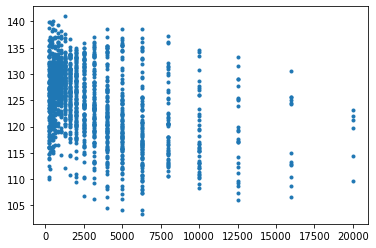

In [110]:
plt.plot(D[:,0],D[:,5],'.')

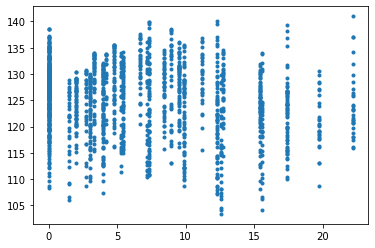

In [111]:
plt.plot(D[:,1],D[:,5],'.')

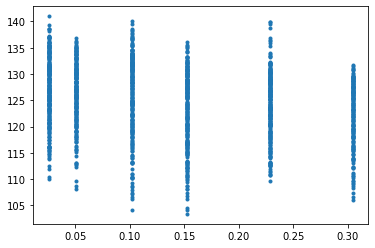

In [112]:
plt.plot(D[:,2],D[:,5],'.')

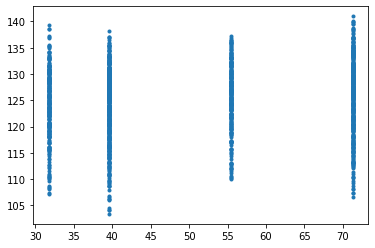

In [113]:
plt.plot(D[:,3],D[:,5],'.')

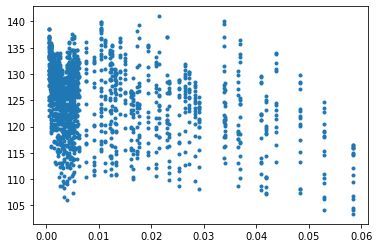

In [114]:
plt.plot(D[:,4],D[:,5],'.')

As we can see, each frequency band corresponds to several different sound pressure targets values.
Therefore, one attribute will not be capable of predicting the target value.

### Shape the data 

In [115]:
x = D[:,0]
t = D[:,5] 
N = x.size
x = ((x-x.min(0))/(x.max(0)-x.min(0))) 
X = np.c_[np.ones(N),x]    # add dummy attribute
w = np.ones((2,1))         # initialise the weights
y = X*w                    # predict
print(X[:5])

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


### Apply the Ordinary Least Squares solution for the identity basis (so $\Phi=X$)

In [116]:
# apply the closed form solution of least squares
F = (X.T*X).I
z = X.T*t
w = F*z
print(w)

[[127.13274179]
 [-16.92858445]]


This shows that the bias w[0] plays an important role in this univariate model.

/Users/karan.verma/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

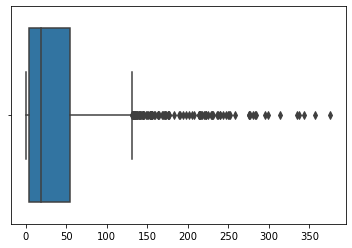

In [117]:
sns.boxplot(np.multiply(X*w-t, X*w-t))

In [118]:
Res = X*w -t

In [119]:
Res.shape

(1503, 1)

In [120]:
# calculate the sum of squared errors
Res = X*w -t
SE1 = Res.T*Res
print(SE1)

[[60570.20622271]]


### Discussion of the meaning of SSE
The above SSE value is deceivingly large. Can you think why?
Think about it, this is the sum of squared errors. So, the larger the dataset the larger this value is going to get, even if the individual errors themselves are small.

Hence, we will take the mean of the squared error.


In [121]:
N = X.shape[0]
MSE1 = (1/N)*SE1
print(MSE1)

[[40.2995384]]


The MSE value is a more reasonable metric that reflects closer on average how big or small we expect the error (deviation) of our model prediction from the real values for *individual* records.
However, we still can do better if we cancel the effect of squaring those individual errors.


Think how should we do that?


...


We can simply take the square root of the MSE. This way we get an estimation of each record to be +- the RMSE value. And this will be in harmony with whatever unit is intrinsically used in the target (instead of the squares of the unit as is the case with MSE).

In [122]:
RMSE1 = np.sqrt(MSE1)
print(RMSE1)

[[6.34819174]]


RMSE is a better reflection of the capabilities of our prediction model. As it stands, we expect our model prediction to deviate by +- 6.3 *on average* from the actual value. This does not guarantee that some errors might be larger than this average. In fact, we can do further analysis on which of those records will exceed this value in order to see if this is caused by spurious data points (outliers).

#### Double checking our results 
We can check our answer by utilising the lstsq function from numpy

In [123]:
np.linalg.lstsq(X, t,rcond=None)[0] # [0] returns the weights [1] returns the SE

matrix([[127.13274179],
        [-16.92858445]])

We can see that our solution is correct albeit the RMSE is higher than what we want it to be (indicating that the model is not able to capture the relationship between frequency and sound level).


The question remains, is it possible to improve the performance of our model further?

We can do so by increasing the complexity of our model since we have done reasonable pre-processing steps already. We have few options:
1. Add more features from the dataset to help the model
2. Increase the complexity of our model by using different basis
3. Both of the above
4. Use a nonlinear model (but we will confine ourselves to the linear model case in this exercise)


### 1- Add more features

Ok this time we will create functions so that we can use them later

In [124]:
def shapeDF(DF,target,normalise=True):
    DFtarg = DF[[target]]                           # separate the target column in a dataframe
    #DF = DF.select_dtypes(include=['float64'])     # get only fileds that are numerical 
    DF = DF.drop([target], axis=1)                  # remove the target fields from the training data
    
    x = np.asmatrix(DF.to_numpy())                  # convert to a numpy array and then to a matrix 
    t = np.asmatrix(DFtarg.to_numpy())
    if(normalise): 
        x = ((x-x.min(0))/(x.max(0)-x.min(0)))      # normalise by rescaling the data
        
    return x,t

In [125]:
def LSQ(x,t):
    # apply the closed form solution of least squares
    print(x.shape)
    N = x.shape[0]
    #M = x.shape[1]

    X = np.c_[np.ones(N),x]                         # add the dummy field
    #X,X[:,1:] = np.ones((N,M+1)),x                 # same as above, this one is faster but less readable    

    F = (X.T*X).I
    z = X.T*t
    w = F*z
    return w, X

In [126]:
def SSE(X,t,w):
    # calculates the sum of squared errors
    Residuals = X*w - t
    SSE = Residuals.T*Residuals
    return SSE

def MSE(X,t,w):
    # calculates the mean of squared errors
    N = X.shape[0]
    MSE = (1.0/N)*SSE(X,t,w)
    return MSE

def RMSE(X,t,w):
    # calculates the root mean of squared errors
    RMSE = np.sqrt(MSE(X,t,w))
    return RMSE
    

Now we have created general functions that we can call to prepare the data, fit a least square model and calculate the sum of squared errors for our soultion

In [127]:
x,t = shapeDF(airfoil, target='Scaled_sound_pressure_level(decibels)')
print(t.shape)
w,X = LSQ(x,t)
SE2 = SSE(X,t,w)
MSE2  = MSE(X,t,w)
RMSE2 = RMSE(X,t,w)


print(w)
print('Sum of Squared Errors = ', SE2)
print('Mean of Squared Errors = ', MSE2)
print('Root Mean of Squared Errors = ', RMSE2) 
# the RMSE is a more accurate measure of per-sample deviation from the 
# true value of the target (in this case, sound decibel levels)


(1503, 1)
(1503, 5)
[[134.77724168]
 [-25.38770076]
 [ -9.36643987]
 [ -9.97122754]
 [  3.95422018]
 [ -8.54499413]]
Sum of Squared Errors =  [[34618.21913267]]
Mean of Squared Errors =  [[23.03274726]]
Root Mean of Squared Errors =  [[4.79924445]]


Note that it is not advised to call all of these functions together as we did earlier for comparison, since this would lead to duplications of the calculation of the residuals 3 times. This is not a problem here, but we can come up with a better way of doing this by combining all the three functions into one that yields the SSE, MSE and RMSE in one go.

In [128]:
RMSE2<RMSE1

matrix([[ True]])

By comparing SE1 (univariate input) and SE2 (multivariate input) we can see that adding more features improved the performance of our model.
For sanity, let us again compare our results with those of numpy lstsq function, note that the results should be almost identical, the 'almost' is because lstsq uses a more tailored inversion for the design matrix called SVD.

In [129]:
SE2_ = np.linalg.lstsq(X, t,rcond=None)[1] # [0] returns the weights [1] returns the SSE
print(SE2_)
print(SE2_ == SE2)
print(SE2_ - SE2)


[[34618.21913267]]
[[False]]
[[5.09317033e-11]]


So we see again that our solution is almost identical to the one provided by numpy, jolly good... let us move to the next option to improve our model.

### 2- Use a Different Basis

#### Polynomial

Note: the below is just one option for a polynomial, you can raise different features to different powers, which would be more effective but you would need more domain knowledge to do that. This also shows the issue of fixed basis models which are difficult to tune their basis. While, as you will see later in non-linear models making the basis adaptable, makes the model more powerful to capture the essence of the data. Of course, this is done on the cost of more complexity and issues arises due to learning those basis, [‘no free lunch theorem’](https://en.wikipedia.org/wiki/No_free_lunch_theorem).

In [130]:
def polyBasis(x,k):
    #Phi = np.power(x,k)
    Phi = x
    for i in range(k):
        Phi = np.multiply(Phi,x)
    
    return Phi

In [131]:
def LSQ_Basis(x,t,funBasis,k=1):    
    #k   = 1 # try different k's 1 is equivalent to keeping the input space as is
    #Phi = polyBasis(x,k)
    Phi   = funBasis(x,k)
    w,Phi = LSQ(Phi,t)
    RMSE_ = RMSE(Phi,t,w)    
    return RMSE_,w

In [132]:
for poly_deg in range(2, 5):
    RMSE3,w = LSQ_Basis(x,t,polyBasis,)
    print('weights = \n', w,'\nRoot Mean Squared Errors = ', RMSE3, 'and  SE3 < SE2 is', RMSE3 <= RMSE2)
    print("**")

(1503, 5)
weights = 
 [[134.77724168]
 [-25.38770076]
 [ -9.36643987]
 [ -9.97122754]
 [  3.95422018]
 [ -8.54499413]] 
Root Mean Squared Errors =  [[4.79924445]] and  SE3 < SE2 is [[ True]]
**
(1503, 5)
weights = 
 [[129.18740568]
 [-25.36179542]
 [ -6.94580204]
 [ -7.96429936]
 [  2.91729087]
 [-12.63528988]] 
Root Mean Squared Errors =  [[5.51551332]] and  SE3 < SE2 is [[False]]
**
(1503, 5)
weights = 
 [[127.33211014]
 [-21.47781732]
 [ -6.07218408]
 [ -6.54624148]
 [  2.32469499]
 [-14.77339903]] 
Root Mean Squared Errors =  [[5.92585655]] and  SE3 < SE2 is [[False]]
**
(1503, 5)
weights = 
 [[126.54557122]
 [-17.83198002]
 [ -5.79540146]
 [ -5.70170705]
 [  1.99215934]
 [-16.01321386]] 
Root Mean Squared Errors =  [[6.12700069]] and  SE3 < SE2 is [[False]]
**
(1503, 5)
weights = 
 [[126.1184796 ]
 [-15.15354427]
 [ -5.51474742]
 [ -5.14237824]
 [  1.78973737]
 [-16.7099395 ]] 
Root Mean Squared Errors =  [[6.2434832]] and  SE3 < SE2 is [[False]]
**


So we could not improve the performance via the simple polynomial basis that we used. Let us see if this can be done via Radial Basis Functions.

#### Radial Basis Functions

The following function attempt to get a set of rbf basis with different centres but same variances with all co-variances assumed to be 0.

In [46]:
def RbfBasis_(X,k, vr=1): # k represents how many components(basis) will come out        
    N  = X.shape[0]
    M  = X.shape[1]

    np.random.seed()
    eps = abs(np.random.rand(k,M))#/10              # generate a set of random centres
    # Please note that better than picking random centres, we could employ clustering see next task in this notebook.
    
    Mu  = np.add(X.mean(0) ,eps)

    #vr = 1.2#1/(1000*k)                           # manually setting the var as a normalisation factor
    #vr    = X.var()
    #Sigma_1 = np.multiply(np.eye(M),1/X.var(0))    # to get the inverse of the covariance matrix cheaply each feature in X has its own variance but all covariances are 0

    Phi = np.asmatrix(np.ones((N,k)))
    for b in range(k):
        Diff   = (X   - Mu[b,:])
        
        # you could use the following 2 lines instead of the line * if you want to have a covariance matrix with different variance and co-variance on each component
        #DiffxS = Diff.multiply(Diff) * Sigma_1 
        #Phi[:,b] = np.exp(-0.5*np.sum(np.multiply(Diff,DiffxS),1))
        
        Phi[:,b] = np.exp(-(1.0/(2*vr))*np.multiply(Diff, Diff).sum(1))  
        
    return Phi

In [48]:
# this will produce a set of features that has the number of the attributes in the dataset.

RMSE4,w = LSQ_Basis(x,t,RbfBasis_,5)
print('weights = \n', w,'\n Root Mean Squared Errors = ', RMSE3, 'and  RMSE4 < RMSE3 is', RMSE4 <= RMSE3, ' and RMSE4 ', RMSE4)


(1503, 5)
weights = 
 [[ 132.1069625 ]
 [ -24.51800115]
 [  27.10556891]
 [  26.90081599]
 [-134.90917162]
 [  32.67104929]] 
 Root Mean Squared Errors =  [[6.2434832]] and  RMSE4 < RMSE3 is [[ True]]  and RMSE4  [[5.08712714]]


In [49]:
i = 1
while i < 1000:
    k   = np.random.randint(1,50) # number of Gaussian basis    
    
    RMSE4,w = LSQ_Basis(x,t,RbfBasis_,k)    
    
    if(i==1 or RMSE4 < RMSE4_best):  RMSE4_best, w_best = RMSE4,w    
    
    i += 1

print('best weights have ', w_best.shape[0],' components \nRoot Mean of Squared Errors = ',
      RMSE4_best, 'and  RMSE4 < RMSE3 is', RMSE4_best <= RMSE4)

(1503, 7)
(1503, 4)
(1503, 36)
(1503, 47)
(1503, 46)
(1503, 6)
(1503, 45)
(1503, 22)
(1503, 24)
(1503, 23)
(1503, 6)
(1503, 5)
(1503, 37)
(1503, 1)
(1503, 46)
(1503, 3)
(1503, 9)
(1503, 2)
(1503, 19)
(1503, 20)
(1503, 17)
(1503, 4)
(1503, 49)
(1503, 7)
(1503, 10)
(1503, 3)
(1503, 3)
(1503, 25)
(1503, 1)
(1503, 27)
(1503, 44)
(1503, 4)
(1503, 3)
(1503, 31)
(1503, 7)
(1503, 44)
(1503, 36)
(1503, 38)
(1503, 5)
(1503, 47)
(1503, 43)
(1503, 4)
(1503, 5)
(1503, 48)
(1503, 18)
(1503, 39)
(1503, 10)
(1503, 17)
(1503, 8)
(1503, 33)
(1503, 4)
(1503, 10)
(1503, 25)
(1503, 15)
(1503, 8)
(1503, 16)
(1503, 43)
(1503, 21)
(1503, 4)
(1503, 14)
(1503, 27)
(1503, 29)
(1503, 27)
(1503, 21)
(1503, 23)
(1503, 18)
(1503, 44)
(1503, 28)
(1503, 34)
(1503, 11)
(1503, 39)
(1503, 23)
(1503, 21)
(1503, 3)
(1503, 30)
(1503, 30)
(1503, 25)
(1503, 38)
(1503, 2)
(1503, 37)
(1503, 42)
(1503, 10)
(1503, 29)
(1503, 2)
(1503, 22)
(1503, 46)
(1503, 1)
(1503, 49)
(1503, 27)
(1503, 11)
(1503, 48)
(1503, 7)
(1503, 24)
(1503,

## Your Turn

1. Apply the above exercise on the following [students dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

2. Try to employ K-means clustering to discover a sensible set of centres instead of picking random centres.

3. Split the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.

4. Consider applying cross validation in the parameter optimisation procedure

### Apply Same Regression Analysis on Student Dataset or any other regression dataset of your choice

1. Copy the exercise and do it on a different dataset

### Try to use Clustering to select RBF Centres

2. Please note that we could better than picking random centres. Try to apply the ideas of clustering here.
What you could do, is to cluster the dataset first, take the centroids as the RBF centres and see if those centres make the results better.
